# Bending moment for Billy

Billy is DAVE's the lifting barge.

DAVEs shear and bending calculations use the same core are the static equilibrium solver. Therefore all forces are included. This includes the tanks, buoyancy, loads due to the crane and tie-back wires.

![image](./images/image000011.png)

*bending*

![image](./images/image000012.png)

*shear*

In [1]:
from DAVE import *

DAVEcore version = 2.0 from c:\python\miniconda3\envs\book\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


Import Billy

In [2]:
s = Scene()
s.import_scene("res: billy.dave", containerize=False, prefix="")

Loading c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\resources\billy.dave
Loading c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\resources\100x30x8_barge.dave


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\nodes.py:4631: UserWarning: BallastSystem.new_tank is outdated and may be removed in a future version.
  warn(


Loading c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\resources\crane block 4p.dave


Ballast billy to 5m draft

In [3]:
s["ps_outer2"].fill_pct = 40
s["sb_inner2"].fill_pct = 100.0
s["sb_outer2"].fill_pct = 100.0
s["ps_inner3"].fill_pct = 100.0
s["ps_outer3"].fill_pct = 100.0
s["sb_inner3"].fill_pct = 100.0
s["sb_outer3"].fill_pct = 100.0
s["ps_inner4"].fill_pct = 100.0
s["ps_outer4"].fill_pct = 100.0
s["sb_inner4"].fill_pct = 100.0
s["sb_outer4"].fill_pct = 100.0
s["ps_inner5"].fill_pct = 100.0
s["ps_outer5"].fill_pct = 100.0
s["sb_inner5"].fill_pct = 100.0
s["sb_outer5"].fill_pct = 100.0
s["ps_inner6"].fill_pct = 100.0
s["ps_outer6"].fill_pct = 61

In [4]:
s.solve_statics()

True

Define the distribution of the self-weight of billy (not present in the default model at the time of writing).

Distribute the self-weight evenly over its length, from x=0 to x=100

In [5]:
s['Billy'].footprint = [(0,0,0),(100,0,0)]

And request the bending moment calc

In [6]:
lsm = s['Billy'].give_load_shear_moment_diagram()

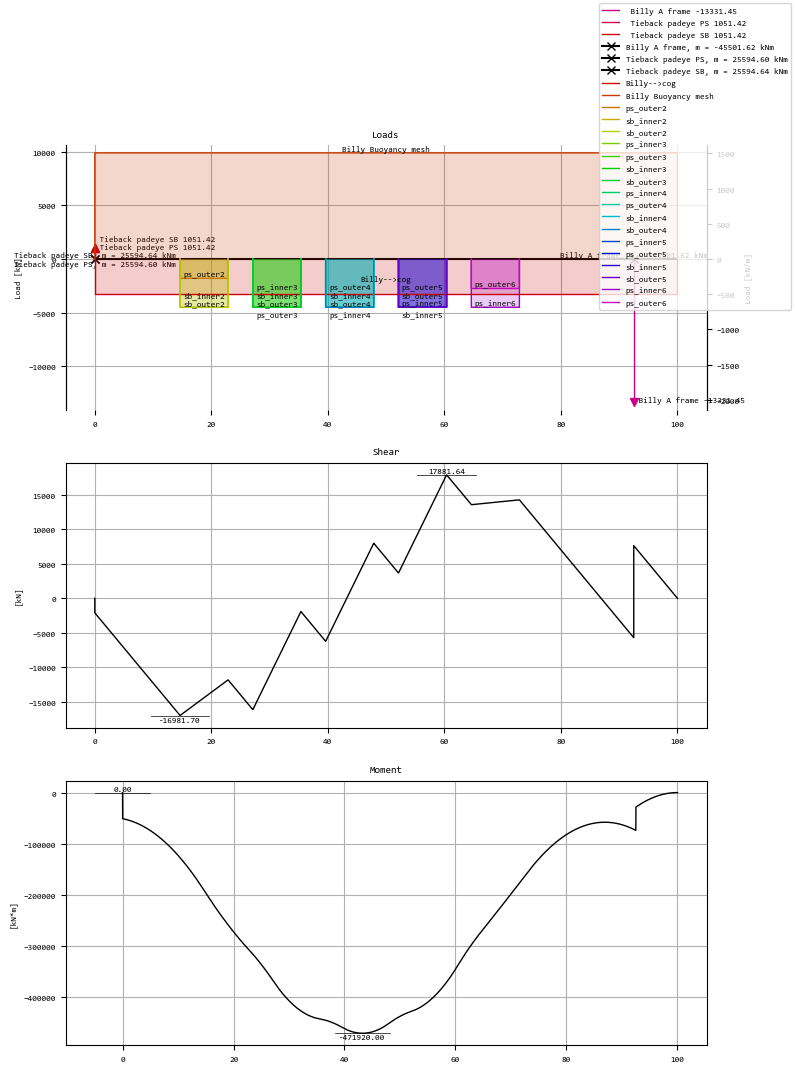

In [8]:
lsm.plot();

For a better readable plot use the .pdf export:

```python
lsm.plot(filename = r'c:\temp\bendingmoment.pdf')
```

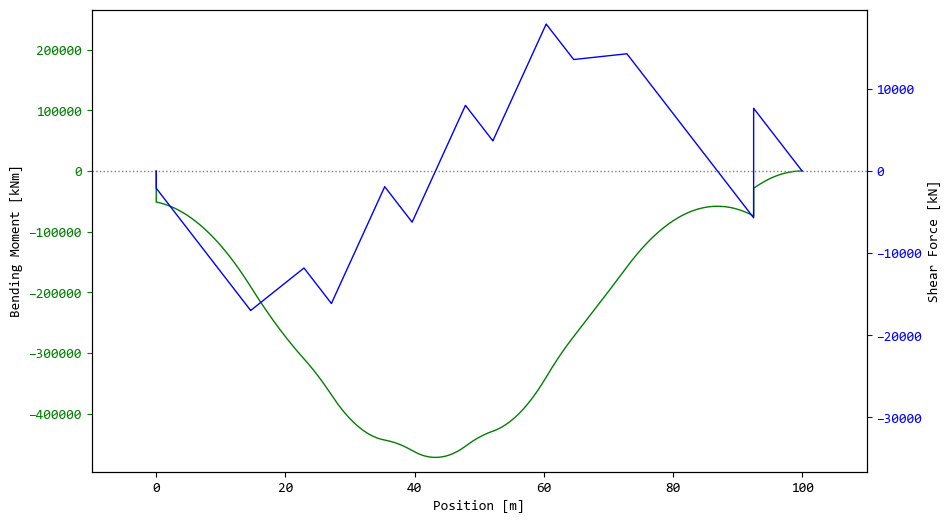

In [9]:
lsm.plot_simple(figsize=(10,6), dpi=100);

It is also possible to add the moment and shear-lines to the 3d view produces with "show".
This is done by generating vtk actors for the moment and shear lines and by then adding them
to the show function.

In [10]:
from DAVE.visual import create_momentline_actors, create_shearline_actors

moment_axis, moment_line = create_momentline_actors(s['Billy'], scale_to=10)
shear_axis, shear_line = create_shearline_actors(s['Billy'], scale_to=10)

No actors created for node Billy Ballast system
number of points changed, creating new


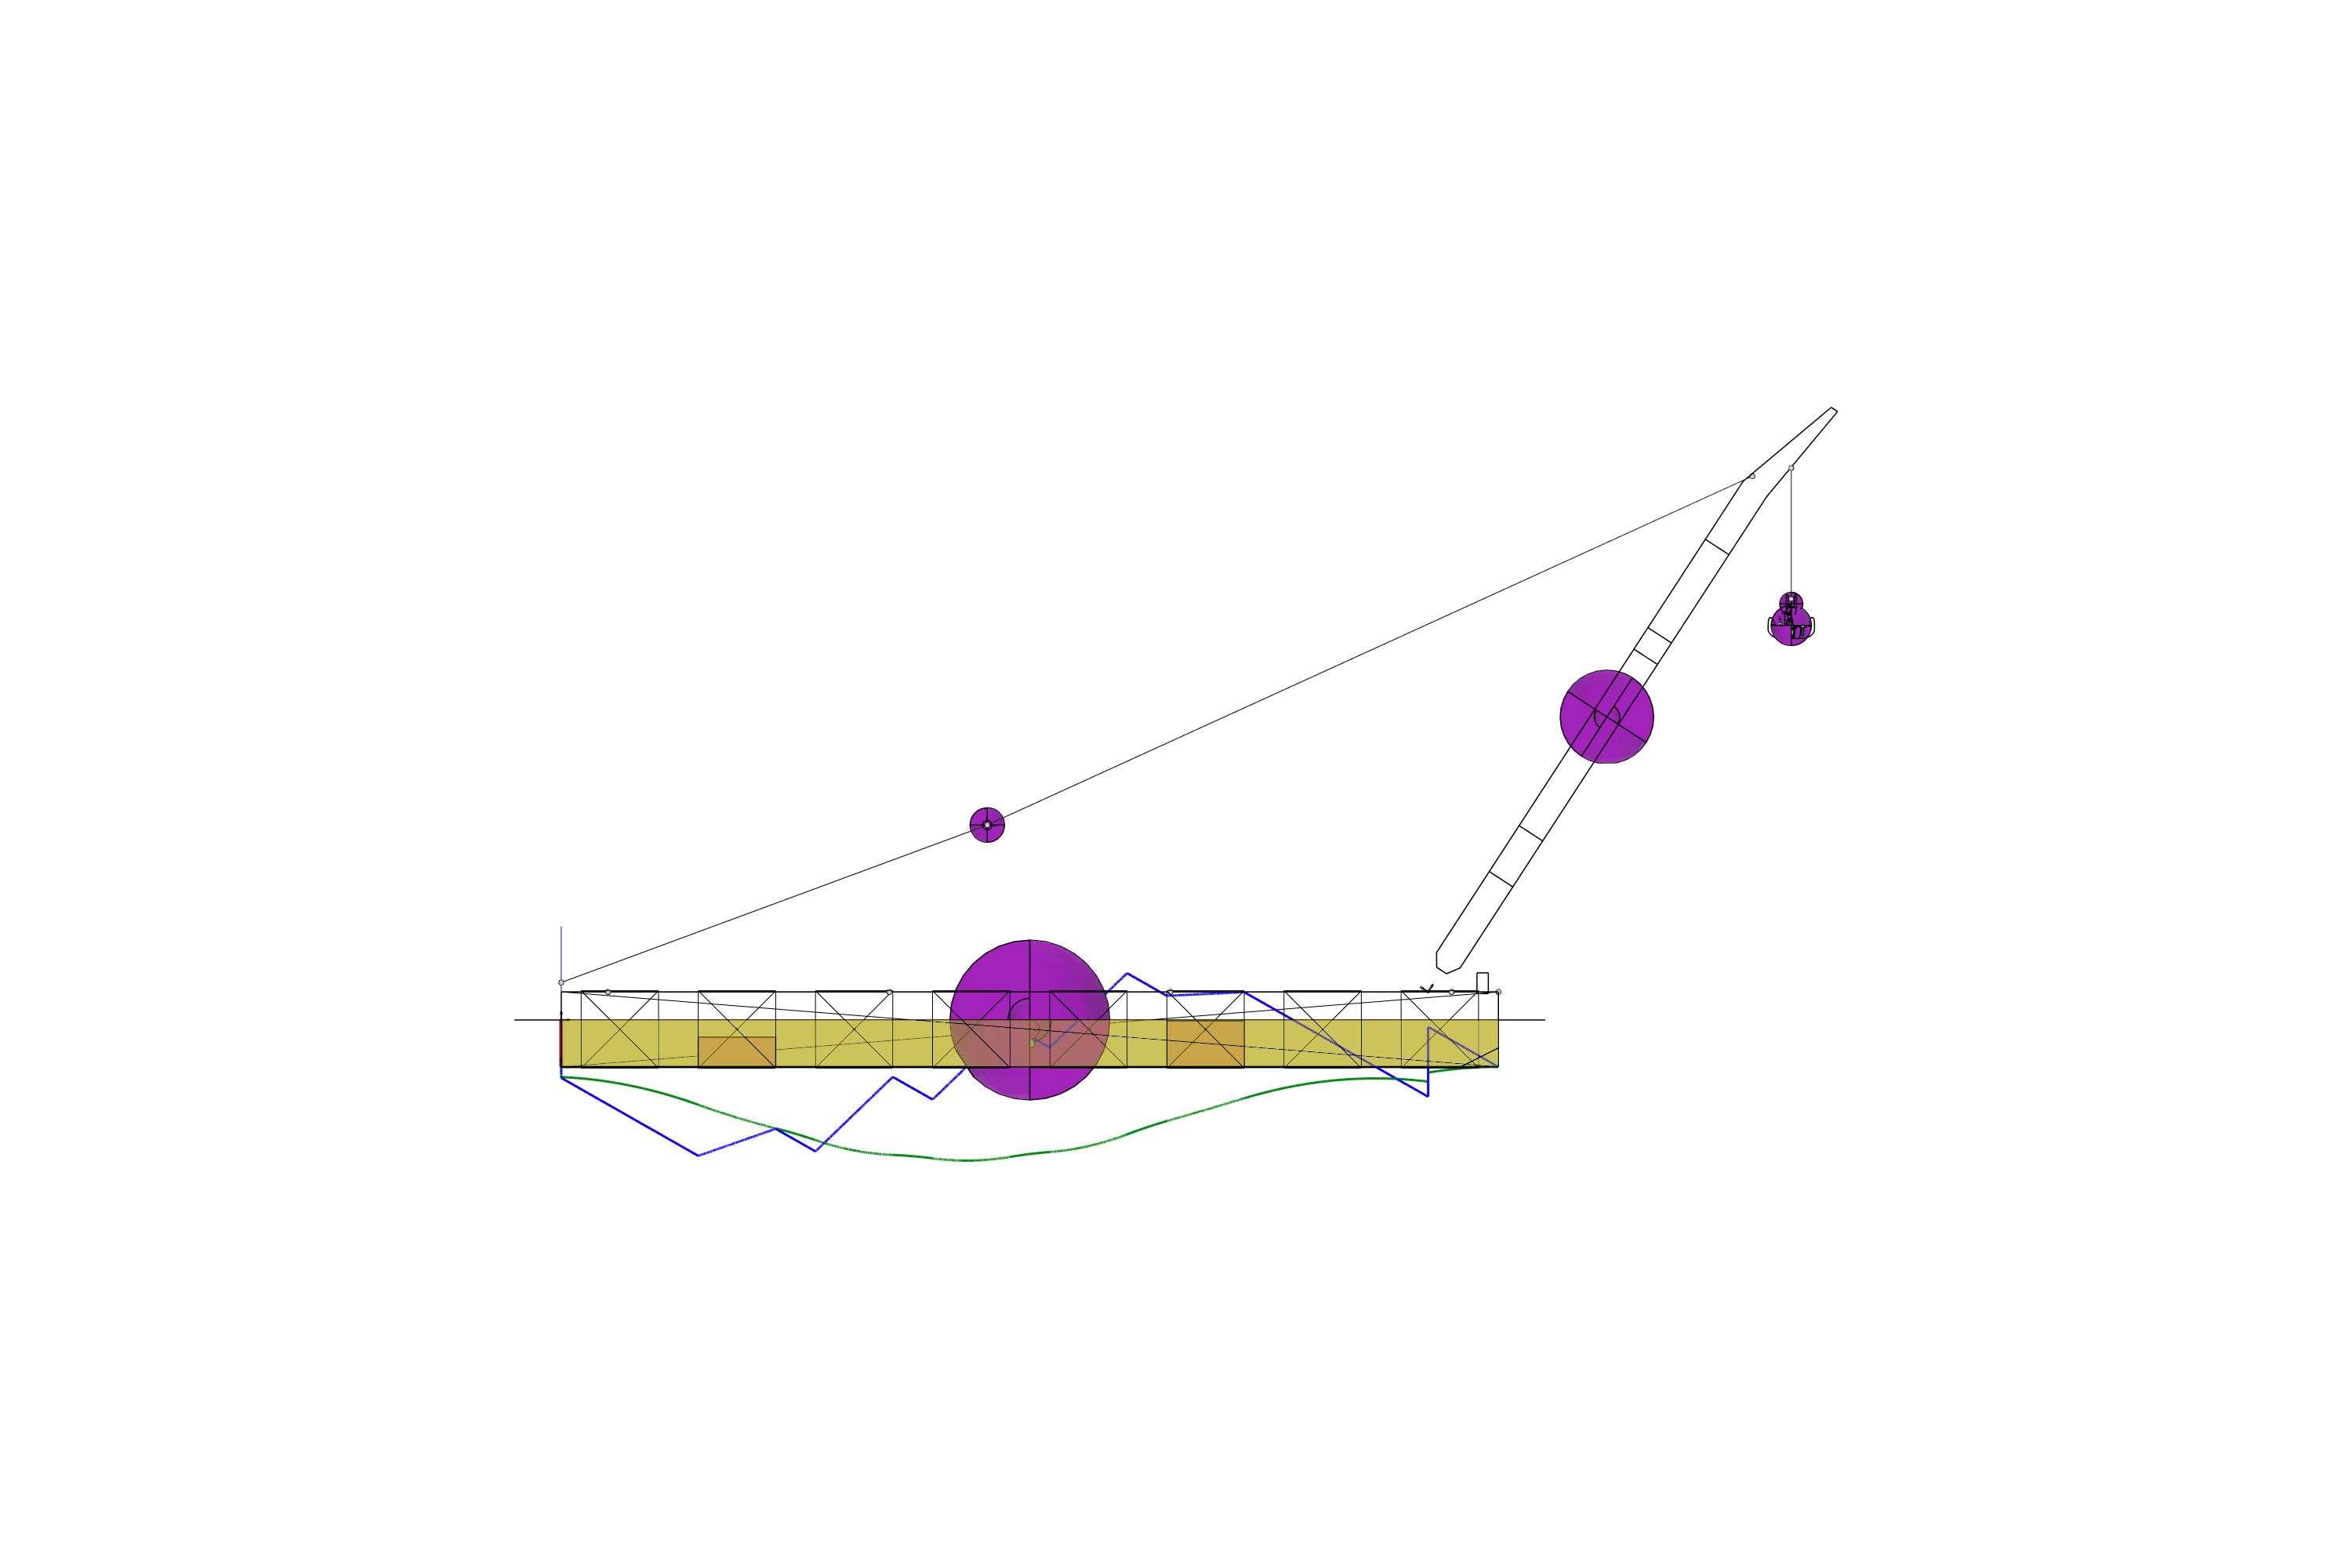

In [14]:
from DAVE.jupyter import *

show(s, camera_pos=(50,-20,0),lookat='y', zoom_fit=True, painters='X-ray',
     additional_actors=(moment_axis, moment_line, shear_line), width=3000, height = 2000)


This shows the shear (blue) and moment (green) lines over the length of the barge. The external forces on the barge due to the tie-back lines, ballast tanks and crane-boom are fully included.

The connection bewteen the boom and the barge is a hinged connection. As such no moment is transferred from the boom onto the barge. The jump in the moment-line at that location is due to the horizontal force in the hinge in combination with the vertical offset of the joint to the z=0 line of billy. The same applied to the connection of the tie-back wire to the barge.

In general the elevation at which the bending moment is calculated influences the contribution of horizontal forces to the moment. The elevation (and the direction) can be chosen by the user.